  last_period_start  cycle_length  period_length next_period_start  \
0        2020-01-13            31              3        2020-02-13   
1        2020-12-12            32              3        2021-01-13   
2        2020-02-17            21              3        2020-03-09   
3        2020-04-11            21              7        2020-05-02   
4        2020-01-04            30              5        2020-02-03   

  ovulation_day  stress_level  exercise_frequency  diet_quality  \
0    2020-01-28             5                   3             4   
1    2020-12-28             9                   1            10   
2    2020-02-27             4                   3             9   
3    2020-04-21             9                   6             4   
4    2020-01-19             3                   6             6   

   sleep_quality  body_temperature  
0              3              36.8  
1              7              36.8  
2             10              36.8  
3              8            

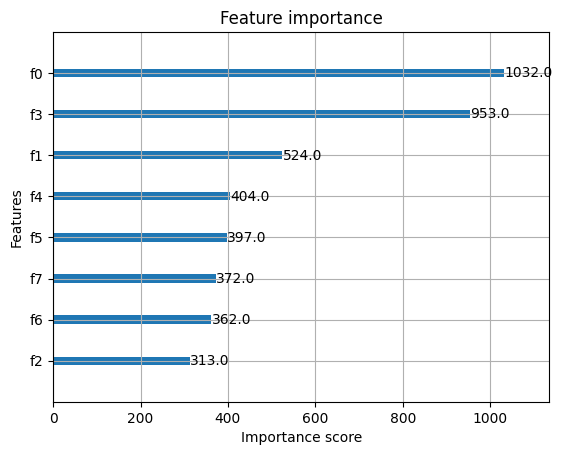

  last_period_start  cycle_length  period_length next_period_start  \
0        2020-01-13            31              3        2020-02-13   
1        2020-12-12            32              3        2021-01-13   
2        2020-02-17            21              3        2020-03-09   
3        2020-04-11            21              7        2020-05-02   
4        2020-01-04            30              5        2020-02-03   

  ovulation_day  stress_level  exercise_frequency  diet_quality  \
0    2020-01-28             5                   3             4   
1    2020-12-28             9                   1            10   
2    2020-02-27             4                   3             9   
3    2020-04-21             9                   6             4   
4    2020-01-19             3                   6             6   

   sleep_quality  body_temperature  
0              3              36.8  
1              7              36.8  
2             10              36.8  
3              8            

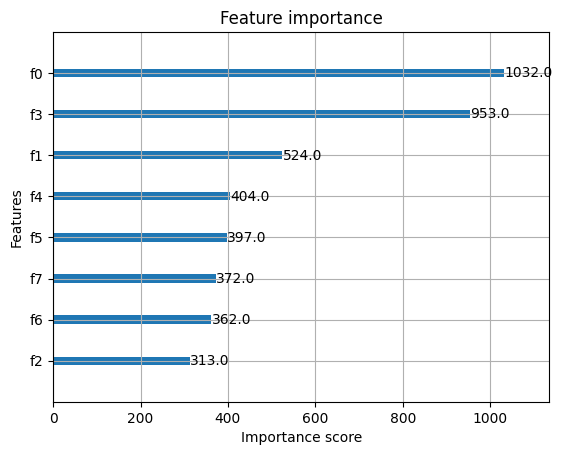

Root Mean Squared Error (RMSE): 90.81210749226945
R² Score: 0.06691205501556396


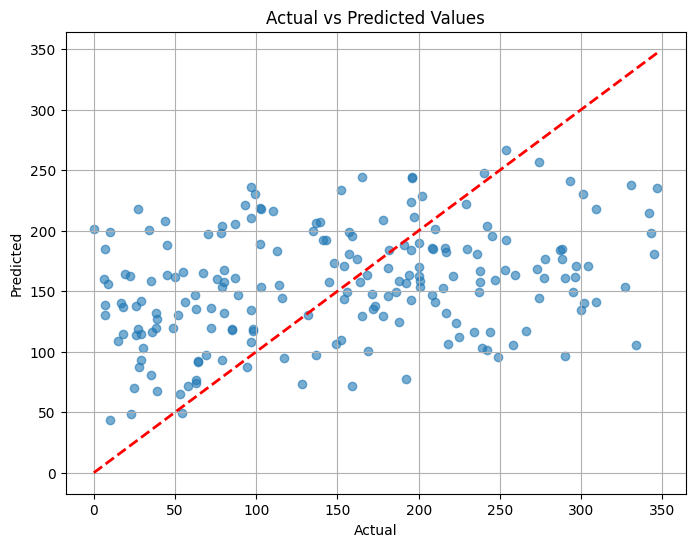

Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 300, 'subsample': 0.7}
Best Score: 72.0150629679362
Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'colsample_bytree': 0.8777755692715243, 'gamma': 1.1439908274581123, 'learning_rate': 0.0330939729486379, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 185, 'subsample': 0.9402339195076288}
Best Score: 72.91556294759114
Tuned MAE: 75.1185531616211
Tuned RMSE: 90.6087539317394
Tuned R²: 0.07108628749847412


In [15]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Step 1: Load the dataset from a CSV file (replace 'your_dataset.csv' with your actual file path)
df = pd.read_csv('my_data.csv')  # Replace with the actual path to your CSV file

# Step 2: Inspect the first few rows of the dataset to understand its structure
print(df.head())

# Step 3: Preprocess the data
# Handle missing values (if any)
# Fill missing values in numeric columns with the median
numeric_columns = df.select_dtypes(include=['number']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())

# For categorical columns, fill missing values with the mode (most frequent value)
non_numeric_columns = df.select_dtypes(exclude=['number']).columns
for col in non_numeric_columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# Step 4: Encode categorical variables (if any)
# For simplicity, let's assume categorical columns are converted using label encoding
for col in non_numeric_columns:
    df[col] = pd.factorize(df[col])[0]  # Converts each unique value to an integer

# Step 5: Feature and Target Variable Separation
# Assume 'next_period_cycle' is the target variable and the rest are features
X = df.drop('next_period_start', axis=1)  # Features (input)
y = df['next_period_start']  # Target variable (output)

# Step 6: Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Scale the features (important for many ML models, including XGBoost)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 8: Train an XGBoost model
dtrain = xgb.DMatrix(X_train_scaled, label=y_train)
dtest = xgb.DMatrix(X_test_scaled, label=y_test)

# Define the parameters for the XGBoost model
params = {
    'objective': 'reg:squarederror',  # Regression task (predicting continuous values)
    'max_depth': 6,                   # Maximum depth of a tree
    'eta': 0.1,                       # Learning rate
    'subsample': 0.8,                 # Fraction of samples to use for each tree
    'colsample_bytree': 0.8,          # Fraction of features to use for each tree
    'eval_metric': 'rmse'             # Evaluation metric (Root Mean Squared Error)
}

# Train the XGBoost model
bst = xgb.train(params, dtrain, num_boost_round=100)

# Step 9: Make predictions on the test set
y_pred = bst.predict(dtest)

# Step 10: Evaluate the model's performance
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

# Optionally, plot the feature importance
xgb.plot_importance(bst)
plt.show()

# Save the trained model for future use (optional)
bst.save_model('xgboost_period_cycle_model.json')



import xgboost as xgb
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Step 1: Load the dataset from a CSV file (replace 'your_dataset.csv' with your actual file path)
df = pd.read_csv('my_data.csv')  # Replace with the actual path to your CSV file

# Step 2: Inspect the first few rows of the dataset to understand its structure
print(df.head())

# Step 3: Preprocess the data
# Handle missing values (if any)
# Fill missing values in numeric columns with the median
numeric_columns = df.select_dtypes(include=['number']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())

# For categorical columns, fill missing values with the mode (most frequent value)
non_numeric_columns = df.select_dtypes(exclude=['number']).columns
for col in non_numeric_columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# Step 4: Encode categorical variables (if any)
# For simplicity, let's assume categorical columns are converted using label encoding
for col in non_numeric_columns:
    df[col] = pd.factorize(df[col])[0]  # Converts each unique value to an integer

# Step 5: Feature and Target Variable Separation
# Assume 'next_period_cycle' is the target variable and the rest are features
X = df.drop('next_period_start', axis=1)  # Features (input)
y = df['next_period_start']  # Target variable (output)

# Step 6: Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Scale the features (important for many ML models, including XGBoost)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 8: Train an XGBoost model
dtrain = xgb.DMatrix(X_train_scaled, label=y_train)
dtest = xgb.DMatrix(X_test_scaled, label=y_test)

# Define the parameters for the XGBoost model
params = {
    'objective': 'reg:squarederror',  # Regression task (predicting continuous values)
    'max_depth': 6,                   # Maximum depth of a tree
    'eta': 0.1,                       # Learning rate
    'subsample': 0.8,                 # Fraction of samples to use for each tree
    'colsample_bytree': 0.8,          # Fraction of features to use for each tree
    'eval_metric': 'rmse'             # Evaluation metric (Root Mean Squared Error)
}

# Train the XGBoost model
bst = xgb.train(params, dtrain, num_boost_round=100)

# Step 9: Make predictions on the test set
y_pred = bst.predict(dtest)

# Step 10: Evaluate the model's performance
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

# Optionally, plot the feature importance
xgb.plot_importance(bst)
plt.show()

# Save the trained model for future use (optional)
bst.save_model('xgboost_period_cycle_model.json')

from sklearn.metrics import mean_squared_error, r2_score

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Calculate R² Score
r2 = r2_score(y_test, y_pred)
print(f'R² Score: {r2}')

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.grid(True)
plt.show()


from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

model = XGBRegressor(objective='reg:squarederror', random_state=42)

param_grid = {
    'max_depth': [4, 6, 8],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'n_estimators': [100, 200, 300]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           scoring='neg_mean_absolute_error', cv=3, verbose=1)

grid_search.fit(X_train_scaled, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", -grid_search.best_score_)

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

param_dist = {
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.5, 0.5),
    'colsample_bytree': uniform(0.5, 0.5),
    'n_estimators': randint(100, 500),
    'gamma': uniform(0, 5),
    'min_child_weight': randint(1, 10)
}

random_search = RandomizedSearchCV(
    estimator=XGBRegressor(objective='reg:squarederror', random_state=42),
    param_distributions=param_dist,
    n_iter=50,
    scoring='neg_mean_absolute_error',
    cv=3,
    verbose=1,
    random_state=42
)

random_search.fit(X_train_scaled, y_train)

print("Best Parameters:", random_search.best_params_)
print("Best Score:", -random_search.best_score_)

best_model = random_search.best_estimator_  # or grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test_scaled)

# Evaluate
print("Tuned MAE:", mean_absolute_error(y_test, y_pred_tuned))
print("Tuned RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_tuned)))
print("Tuned R²:", r2_score(y_test, y_pred_tuned))
